In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pyreadr
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import sklearn


#sklearn.metrics.SCORERS.keys()

In [6]:
!pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
distutils: /home/ffc4001/.local/lib/python3.9/site-packages
sysconfig: /home/ffc4001/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None


In [ ]:
#Add columns.csv.npy, /Users/fayzan/PycharmProjects/PGS/Data/df10.rds, Data/pdcases.csv, ppmialignedtoukbiogwas.rds

In [9]:
data = pyreadr.read_r('/home/ffc4001/ukbiobankdata/serverdata/df10.rds')
df = data[None]
df.rename(columns = {'X21022.0.0':'Age'}, inplace = True)

In [10]:
df

,eid_correct,Unknown,EID,Genotyping Array,Batch,Plate.Name,Well,Cluster.CR,dQC,Internal.Pico,...,X21.38740824_A_G_G,X21.39972727_C_A_A,X21.44357419_T_G_T,X22.22599537_G_A_A,X22.29656431_C_T_T,X22.39738425_A_C_A,X22.39738501_G_C_G,X22.39743170_G_T_G,X22.39758541_A_G_A,X22.39758881_A_G_A
0,1000013,A550484-4256924-081516-126_D01,1000013,UKBB,Batch_b085,SMP4_0014675A,D01,99.791,0.98000,38.9200,...,0,2,0,0,0,0,0,0,0,0
1,1000024,A550465-4195810-090314-853_G11,1000024,UKBL,UKBiLEVEAX_b10,SMP4_0008989,G11,99.144,0.98328,42.4077,...,0,1,0,0,0,0,0,0,0,0
2,1000048,A550484-4256917-081316-053_H04,1000048,UKBB,Batch_b086,SMP4_0015928A,H04,99.800,0.99000,33.7400,...,1,0,0,0,0,0,0,0,0,0
3,1000055,A550484-4256305-080616-828_F03,1000055,UKBB,Batch_b090,SMP4_0012484A,F03,99.750,0.98000,40.3500,...,0,1,2,0,0,1,1,1,0,0
4,1000067,A550484-4255254-072116-313_E08,1000067,UKBB,Batch_b084,SMP4_0009406A,E08,99.007,0.96000,29.0900,...,1,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408410,6025313,A550484-4256928-081616-316_A08,6025313,UKBB,Batch_b085,SMP4_0015885A,A08,99.730,0.99000,32.7300,...,0,1,1,0,0,1,1,1,0,0
408411,6025324,A550484-4248959-050516-528_B08,6025324,UKBB,Batch_b073,SMP4_0010000A,B08,99.482,0.98000,21.3100,...,0,2,2,0,0,0,0,0,0,0
408412,6025348,A550484-4261892-101716-410_A05,6025348,UKBB,Batch_b094,SMP4_0018028A,A05,99.708,0.97000,39.1300,...,1,1,0,0,0,1,1,1,0,0
408413,6025355,A550484-4245646-040516-701_G07,6025355,UKBB,Batch_b062,SMP4_0012176B,G07,99.792,0.97000,20.8300,...,0,0,2,0,0,0,0,0,0,0


In [11]:
updated_cases = pd.read_csv("/home/ffc4001/ukbiobankdata/serverdata/pdcases.csv")

In [12]:
updated_cases = updated_cases.rename({'eid':'eid_correct'}, axis=1)

In [13]:
updated_cases['eid_correct']=updated_cases.eid_correct.astype('float64')

In [14]:
updated_cases['Parkinsons']=updated_cases.Parkinsons.astype('float64')

In [15]:
df['eid_correct']=df.eid_correct.astype('float64')

In [16]:
df["PCA1"]

0        -12.88610
1        -13.96610
2        -13.23760
3        -13.57610
4        -13.36980
            ...   
408410   -13.49300
408411   -13.22600
408412   -12.96610
408413    -8.94942
408414   -11.73810
Name: PCA1, Length: 408415, dtype: float64

In [17]:
df = df.rename({'Parkinsons':'Parkinsons_old'}, axis=1)

In [18]:
df1 = df.merge(updated_cases, on="eid_correct")

In [19]:
df1.Parkinsons_old.sum()

1595.0

In [20]:
df = df1

In [21]:
#eid = df["eid_correct"]

In [22]:
#eid.to_csv("eid.csv")

In [23]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [24]:
missing_value_df

,column_name,percent_missing
eid_correct,eid_correct,0.000000
Unknown,Unknown,0.000000
EID,EID,0.000000
Genotyping Array,Genotyping Array,0.000000
Batch,Batch,0.000000
...,...,...
X22.39738501_G_C_G,X22.39738501_G_C_G,0.862559
X22.39743170_G_T_G,X22.39743170_G_T_G,1.150078
X22.39758541_A_G_A,X22.39758541_A_G_A,3.283699
X22.39758881_A_G_A,X22.39758881_A_G_A,5.175108


In [25]:
#Subset Data, Remove high missingness, then mode impute

In [26]:
df.columns[1:100]

Index(['Unknown', 'EID', 'Genotyping Array', 'Batch', 'Plate.Name', 'Well',
       'Cluster.CR', 'dQC', 'Internal.Pico', 'Submitted_Gender',
       'Inferred_Gender', 'X.intensity', 'Y.intensity', 'Submitted Plate Name',
       'Submitted.Well', 'Sample.QC.Missing.Rate', 'Heterozygosity',
       'Heterozygosity.pc.corrected', 'het.missing.outliers',
       'Putative.sex.chromosome.aneuplodiy', 'in.kinship.table',
       'excluded.from.kinship.inference', 'excess.relatives',
       'in.white.british.ancestry.subset', 'used.in.pca', 'PCA1', 'PCA2',
       'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10',
       'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16', 'PCA17', 'PCA18',
       'PCA19', 'PCA20', 'PCA21', 'PCA22', 'PCA23', 'PCA24', 'PCA25', 'PCA26',
       'PCA27', 'PCA28', 'PCA29', 'PCA30', 'PCA31', 'PCA32', 'PCA33', 'PCA34',
       'PCA35', 'PCA36', 'PCA37', 'PCA38', 'PCA39', 'PCA40',
       'in.Phasing.Input.chr1_22', 'in.Phasing.Input.chrX',
       'in.Phasin

In [27]:
df.drop(["Parkinsons_old", "Batch", "Genotyping Array", "Unknown", "EID", "Plate.Name", "Well", "Cluster.CR", "dQC", "Internal.Pico", "Submitted_Gender", "X.intensity", "Y.intensity", 'Submitted Plate Name',
       'Submitted.Well', 'Sample.QC.Missing.Rate', 'Heterozygosity',
       'Heterozygosity.pc.corrected', 'het.missing.outliers',
       'Putative.sex.chromosome.aneuplodiy', 'in.kinship.table',
       'excluded.from.kinship.inference', 'excess.relatives',
       'in.white.british.ancestry.subset', 'used.in.pca', 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8','PCA9', 'PCA10', "PCA11", "PCA12", 'PCA13', 'PCA14', 'PCA15', 'PCA16', 'PCA17', 'PCA18',
       'PCA19', 'PCA20', 'PCA21', 'PCA22', 'PCA23', 'PCA24', 'PCA25', 'PCA26',
       'PCA27', 'PCA28', 'PCA29', 'PCA30', 'PCA31', 'PCA32', 'PCA33', 'PCA34',
       'PCA35', 'PCA36', 'PCA37', 'PCA38', 'PCA39', 'PCA40', 'in.Phasing.Input.chr1_22',
        'in.Phasing.Input.chrX',
       'in.Phasing.Input.chrXY', 'Ethnicity'], axis = 1, inplace=True)

In [28]:
limitPer = len(df) * .15
df = df.dropna(thresh=limitPer, axis=1)

In [29]:
df

,eid_correct,Inferred_Gender,Age,X1.8495945_T_C_C,X1.20149058_A_G_G,X1.20149560_G_A_A,X1.20150839_A_G_G,X1.20150984_C_G_G,X1.20150998_A_G_G,X1.20151290_C_A_A,...,X21.39972727_C_A_A,X21.44357419_T_G_T,X22.22599537_G_A_A,X22.29656431_C_T_T,X22.39738425_A_C_A,X22.39738501_G_C_G,X22.39743170_G_T_G,X22.39758541_A_G_A,X22.39758881_A_G_A,Parkinsons
0,1000013.0,F,46,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0.0
1,1000024.0,F,66,0,2,2,2,2,2,2,...,1,0,0,0,0,0,0,0,0,0.0
2,1000048.0,M,63,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0.0
3,1000055.0,F,52,2,1,1,1,1,1,1,...,1,2,0,0,1,1,1,0,0,0.0
4,1000067.0,M,46,1,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408315,6025313.0,F,64,1,0,0,0,0,0,0,...,1,1,0,0,1,1,1,0,0,0.0
408316,6025324.0,M,50,1,0,NaN,NaN,NaN,NaN,0,...,2,2,0,0,0,0,0,0,0,0.0
408317,6025348.0,M,60,0,0,0,0,0,0,0,...,1,0,0,0,1,1,1,0,0,0.0
408318,6025355.0,F,43,1,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0.0


In [30]:
#df.fillna(df.mode().iloc[0], inplace=True)

In [31]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [32]:
df_target = np.asarray(df.Parkinsons)
df['Y'] = pd.Series(df_target)

# input
#X = df.iloc[:, :-1]

#output
#Y = df.iloc[:, -1]

#print(df.head())

In [33]:
#df.drop(["Batch"], axis =1, inplace=True)

In [34]:
df.drop(["Parkinsons"], axis=1, inplace=True)
df['Inferred_Gender'].replace(['F','M'],[0,1],inplace=True)

In [35]:
df.isna().sum()

eid_correct               0
Inferred_Gender           0
Age                       0
X1.8495945_T_C_C       4795
X1.20149058_A_G_G      3746
                      ...  
X22.39738501_G_C_G     3522
X22.39743170_G_T_G     4696
X22.39758541_A_G_A    13408
X22.39758881_A_G_A    21131
Y                         0
Length: 639, dtype: int64

In [36]:
#df.to_csv("ukbiobank_variantsonly.csv")

In [37]:
df

,eid_correct,Inferred_Gender,Age,X1.8495945_T_C_C,X1.20149058_A_G_G,X1.20149560_G_A_A,X1.20150839_A_G_G,X1.20150984_C_G_G,X1.20150998_A_G_G,X1.20151290_C_A_A,...,X21.39972727_C_A_A,X21.44357419_T_G_T,X22.22599537_G_A_A,X22.29656431_C_T_T,X22.39738425_A_C_A,X22.39738501_G_C_G,X22.39743170_G_T_G,X22.39758541_A_G_A,X22.39758881_A_G_A,Y
0,1000013.0,0,46,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0.0
1,1000024.0,0,66,0,2,2,2,2,2,2,...,1,0,0,0,0,0,0,0,0,0.0
2,1000048.0,1,63,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0.0
3,1000055.0,0,52,2,1,1,1,1,1,1,...,1,2,0,0,1,1,1,0,0,0.0
4,1000067.0,1,46,1,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408315,6025313.0,0,64,1,0,0,0,0,0,0,...,1,1,0,0,1,1,1,0,0,0.0
408316,6025324.0,1,50,1,0,NaN,NaN,NaN,NaN,0,...,2,2,0,0,0,0,0,0,0,0.0
408317,6025348.0,1,60,0,0,0,0,0,0,0,...,1,0,0,0,1,1,1,0,0,0.0
408318,6025355.0,0,43,1,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0.0


In [38]:
#df['Genotyping Array'].replace(['UKBB','UKBL'],[0,1],inplace=True)
#df["Batch"] = pd.factorize(df.Batch)[0]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(
    df.iloc[:, :-1], df.iloc[:, -1],
    test_size = 0.40, random_state=1)

print("Train data shape of X = % s and Y = % s : "%(
    x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
    x_test.shape, y_test.shape))

Train data shape of X = (244992, 638) and Y = (244992,) : 
Test data shape of X = (163328, 638) and Y = (163328,) : 


In [40]:
y_test.value_counts()

0.0    161909
1.0      1419
Name: Y, dtype: int64

In [41]:
b = np.load('/home/ffc4001/ukbiobankdata/serverdata/columns.csv.npy')
b

array(['Age', 'Inferred_Gender', 'X1.108176287_C_T_T',
       'X1.151115007_G_A_A', 'X1.154837939_A_G_G', 'X1.155026114_C_T_C',
       'X1.155033317_T_C_T', 'X1.155033918_C_T_T', 'X1.155034632_C_G_G',
       'X1.155044197_T_G_G', 'X1.155074903_G_T_G', 'X1.155076043_C_T_C',
       'X1.155076505_A_G_A', 'X1.155076734_C_T_C', 'X1.155080090_A_G_A',
       'X1.155081940_T_C_T', 'X1.155082298_T_C_T', 'X1.155083942_T_C_T',
       'X1.155097562_C_G_G', 'X1.155198771_A_G_G', 'X1.160742649_C_T_C',
       'X1.160742850_A_G_A', 'X1.160970089_C_T_T', 'X1.161389646_G_A_A',
       'X1.161452866_G_T_T', 'X1.161468430_C_T_T', 'X1.171719769_C_T_T',
       'X1.171863472_T_G_G', 'X1.183517524_T_C_C', 'X1.20149058_A_G_G',
       'X1.20149560_G_A_A', 'X1.20150839_A_G_G', 'X1.20150984_C_G_G',
       'X1.20150998_A_G_G', 'X1.20151290_C_A_A', 'X1.20151431_A_G_G',
       'X1.20151939_G_C_C', 'X1.20155678_C_T_T', 'X1.20157585_A_T_T',
       'X1.20158241_T_C_C', 'X1.20158604_T_G_G', 'X1.20159225_T_A_A',
       'X

In [42]:

x_train = x_train[b]
x_test = x_test[b]

In [43]:
#Need to match case and control and try random forest. Also imputation and prccice. And add age

In [44]:
x_train.fillna(x_train.mode().iloc[0], inplace=True)
x_test.fillna(x_test.mode().iloc[0], inplace=True)

In [45]:
#Scale data
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#pipe = make_pipeline(StandardScaler(), LogisticRegression())
#pipe.fit(x_train, y_train)  # apply scaling on training data
#pipe.score(x_test, y_test)  # apply scaling on testing data, without leaking training data.

#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(x_train)
#X_test = sc.transform(x_test)



In [46]:
#x_train.drop(["Batch"], axis =1, inplace=True)
#x_train.drop(["Genotyping Array"], axis =1, inplace=True)

In [47]:
x_train

,Age,Inferred_Gender,X1.108176287_C_T_T,X1.151115007_G_A_A,X1.154837939_A_G_G,X1.155026114_C_T_C,X1.155033317_T_C_T,X1.155033918_C_T_T,X1.155034632_C_G_G,X1.155044197_T_G_G,...,X9.17726888_C_T_T,X9.33778399_G_A_G,X9.34046391_C_T_C,X9.5023192_A_G_G,X9.5065003_C_G_G,X9.86258685_A_C_C,X9.86945961_A_C_C,X9.89056018_A_G_G,X9.89059858_G_A_A,X9.93256092_T_C_T
282666,66,1,2,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,2,2,0
347238,64,0,0,0,0,1,0,1,1,0,...,0,1,1,0,0,0,0,1,1,0
157205,44,1,2,0,0,2,0,0,0,0,...,1,0,0,0,0,1,0,1,1,1
39564,56,0,0,0,0,0,0,1,1,0,...,0,1,1,0,0,0,0,1,1,0
306310,51,1,2,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73349,52,1,1,0,0,0,0,0,0,0,...,0,1,1,0,0,2,0,0,0,1
371403,61,1,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,1,2
312201,62,1,1,0,0,2,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
267336,63,1,0,0,0,1,1,0,0,0,...,0,1,1,0,0,1,0,1,1,1


In [48]:
#x_test.drop(["Batch"], axis =1, inplace=True)
#x_test.drop(["Genotyping Array"], axis =1, inplace=True)

In [49]:
b = np.append(b, "eid_correct")

In [50]:
x_train

,Age,Inferred_Gender,X1.108176287_C_T_T,X1.151115007_G_A_A,X1.154837939_A_G_G,X1.155026114_C_T_C,X1.155033317_T_C_T,X1.155033918_C_T_T,X1.155034632_C_G_G,X1.155044197_T_G_G,...,X9.17726888_C_T_T,X9.33778399_G_A_G,X9.34046391_C_T_C,X9.5023192_A_G_G,X9.5065003_C_G_G,X9.86258685_A_C_C,X9.86945961_A_C_C,X9.89056018_A_G_G,X9.89059858_G_A_A,X9.93256092_T_C_T
282666,66,1,2,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,2,2,0
347238,64,0,0,0,0,1,0,1,1,0,...,0,1,1,0,0,0,0,1,1,0
157205,44,1,2,0,0,2,0,0,0,0,...,1,0,0,0,0,1,0,1,1,1
39564,56,0,0,0,0,0,0,1,1,0,...,0,1,1,0,0,0,0,1,1,0
306310,51,1,2,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73349,52,1,1,0,0,0,0,0,0,0,...,0,1,1,0,0,2,0,0,0,1
371403,61,1,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,1,2
312201,62,1,1,0,0,2,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
267336,63,1,0,0,0,1,1,0,0,0,...,0,1,1,0,0,1,0,1,1,1


In [51]:
#DROP EID

In [53]:
#Hyperparameter tuning
logistic_search = LogisticRegression(class_weight="balanced")
solvers = ['lbfgs']
c_values = [100, 10, 1.0, 0.1, 0.01]
iter = [500]
grid = dict(solver=solvers,C=c_values, max_iter=iter)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logistic_search, param_grid=grid, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/home/ffc4001/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ffc4001/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/home/ffc4001/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ffc4001/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Best: 0.717392 using {'C': 0.01, 'max_iter': 500, 'solver': 'lbfgs'}
0.708488 (0.006273) with: {'C': 100, 'max_iter': 500, 'solver': 'lbfgs'}
0.709481 (0.006095) with: {'C': 10, 'max_iter': 500, 'solver': 'lbfgs'}
0.708762 (0.005747) with: {'C': 1.0, 'max_iter': 500, 'solver': 'lbfgs'}
0.710109 (0.005266) with: {'C': 0.1, 'max_iter': 500, 'solver': 'lbfgs'}
0.717392 (0.006126) with: {'C': 0.01, 'max_iter': 500, 'solver': 'lbfgs'}


/home/ffc4001/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
classifier = LogisticRegression(class_weight="balanced",C=0.01, max_iter=400, solver='lbfgs')
classifier.fit(x_train, y_train)


/home/ffc4001/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01, class_weight='balanced', max_iter=400)

In [94]:

y_pred = classifier.predict(x_test)
test_acc = sklearn.metrics.roc_auc_score(y_test, y_pred)
print("The AUC ROC for Test Set is {}".format(test_acc*100))

The AUC ROC for Test Set is 66.93841228930349


array([1., 0., 0., ..., 0., 0., 1.])

Text(0.5, 36.72222222222221, 'Predicted Values')

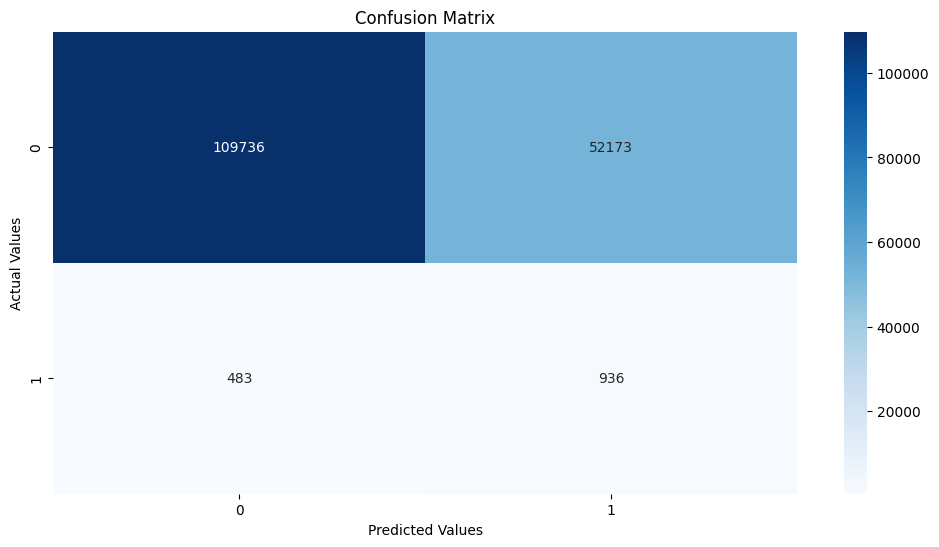

In [56]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [57]:
tn, fp, fn, tp = cm.ravel()

In [58]:
specificity = tn / (tn+fp)

In [59]:
sens = tp / (tp+fn)

In [60]:
specificity

0.6777634350159658

In [61]:
sens

0.6596194503171248

In [170]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegressionCV
#classifier1 = RandomForestClassifier()
#classifier1.fit(x_train, y_train)

In [171]:
#import sklearn.metrics
#from sklearn.metrics import accuracy_score
#import seaborn as sns
#from sklearn.metrics import confusion_matrix
#y_pred = classifier1.predict(x_test)
#test_acc = sklearn.metrics.roc_auc_score(y_test, y_pred)
#print("The Accuracy for Test Set is {}".format(test_acc*100))

In [172]:
##Try autoencoder for snps
#import shap
# Fits the explainer
#explainer = shap.Explainer(classifier.predict, x_test)
# Calculates the SHAP values - It takes some time
#shap_values = explainer(x_test, max_evals="auto")

In [173]:
# Evaluate SHAP values
#shap_values = explainer.shap_values(X)
#shap.plots.beeswarm(shap_values)

In [200]:
#b = np.load('columns.csv.npy')

In [62]:
b = np.append(b, "Y")

In [63]:
b

array(['Age', 'Inferred_Gender', 'X1.108176287_C_T_T',
       'X1.151115007_G_A_A', 'X1.154837939_A_G_G', 'X1.155026114_C_T_C',
       'X1.155033317_T_C_T', 'X1.155033918_C_T_T', 'X1.155034632_C_G_G',
       'X1.155044197_T_G_G', 'X1.155074903_G_T_G', 'X1.155076043_C_T_C',
       'X1.155076505_A_G_A', 'X1.155076734_C_T_C', 'X1.155080090_A_G_A',
       'X1.155081940_T_C_T', 'X1.155082298_T_C_T', 'X1.155083942_T_C_T',
       'X1.155097562_C_G_G', 'X1.155198771_A_G_G', 'X1.160742649_C_T_C',
       'X1.160742850_A_G_A', 'X1.160970089_C_T_T', 'X1.161389646_G_A_A',
       'X1.161452866_G_T_T', 'X1.161468430_C_T_T', 'X1.171719769_C_T_T',
       'X1.171863472_T_G_G', 'X1.183517524_T_C_C', 'X1.20149058_A_G_G',
       'X1.20149560_G_A_A', 'X1.20150839_A_G_G', 'X1.20150984_C_G_G',
       'X1.20150998_A_G_G', 'X1.20151290_C_A_A', 'X1.20151431_A_G_G',
       'X1.20151939_G_C_C', 'X1.20155678_C_T_T', 'X1.20157585_A_T_T',
       'X1.20158241_T_C_C', 'X1.20158604_T_G_G', 'X1.20159225_T_A_A',
       'X

In [73]:
#load in ppmi data
ppmi = pyreadr.read_r('/home/ffc4001/ukbiobankdata/serverdata/ppmialignedtoukbiogwas.rds')
ppmi1 = ppmi[None]
ppmi1.rename(columns = {'gen':'Inferred_Gender', 'age':'Age', 'APPRDX':'Y', "PATNO":"eid_correct"}, inplace = True)

In [79]:
x_train

,Age,Inferred_Gender,X1.108176287_C_T_T,X1.151115007_G_A_A,X1.154837939_A_G_G,X1.155026114_C_T_C,X1.155033317_T_C_T,X1.155033918_C_T_T,X1.155034632_C_G_G,X1.155044197_T_G_G,...,X9.17726888_C_T_T,X9.33778399_G_A_G,X9.34046391_C_T_C,X9.5023192_A_G_G,X9.5065003_C_G_G,X9.86258685_A_C_C,X9.86945961_A_C_C,X9.89056018_A_G_G,X9.89059858_G_A_A,X9.93256092_T_C_T
282666,66,1,2,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,2,2,0
347238,64,0,0,0,0,1,0,1,1,0,...,0,1,1,0,0,0,0,1,1,0
157205,44,1,2,0,0,2,0,0,0,0,...,1,0,0,0,0,1,0,1,1,1
39564,56,0,0,0,0,0,0,1,1,0,...,0,1,1,0,0,0,0,1,1,0
306310,51,1,2,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73349,52,1,1,0,0,0,0,0,0,0,...,0,1,1,0,0,2,0,0,0,1
371403,61,1,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,1,2
312201,62,1,1,0,0,2,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
267336,63,1,0,0,0,1,1,0,0,0,...,0,1,1,0,0,1,0,1,1,1


In [74]:
ppmi1

,eid_correct,Age,Inferred_Gender,Y,FID,PAT,MAT,SEX,PHENOTYPE,X1.8495945_T_C_C,...,X20.62294447_G_A_A,X21.16812882_C_T_T,X21.38740824_A_G_G,X21.39972727_C_A_A,X22.29656431_C_T_T,X22.39738425_A_C_A,X22.39738501_G_C_G,X22.39743170_G_T_G,X22.39758541_A_G_A,X22.39758881_A_G_A
0,3000.0,69.139726,2.0,2.0,3000,0,0,2,-9,1,...,0,2,0,1,0,0,0,0,0,0
1,3001.0,65.142466,1.0,1.0,3001,0,0,1,-9,0,...,0,1,0,1,0,1,1,1,0,0
2,3002.0,67.578082,2.0,1.0,3002,0,0,2,-9,1,...,0,1,2,0,0,0,0,0,0,0
3,3003.0,56.717808,2.0,1.0,3003,0,0,2,-9,1,...,0,1,NaN,NaN,NaN,2,2,2,0,NaN
4,3004.0,59.413699,1.0,2.0,3004,0,0,1,-9,1,...,1,1,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,4124.0,71.117808,1.0,1.0,4124,0,0,1,-9,2,...,0,0,1,0,0,2,2,2,1,1
425,4125.0,64.019178,1.0,1.0,4125,0,0,1,-9,2,...,0,0,1,1,0,0,0,0,0,0
426,4126.0,55.734247,1.0,1.0,4126,0,0,1,-9,1,...,0,2,0,1,0,1,1,1,0,0
427,4136.0,55.764384,1.0,1.0,4136,0,0,1,-9,0,...,0,1,0,1,0,0,0,0,0,1


In [75]:
#load in ppmi data

#ppmi1
ppmi2 = ppmi1[b]
ppmi2
ppmi2.drop(["eid_correct"], axis=1, inplace=True)
#ppmi2['Y']
ppmi2.loc[ppmi2["Y"] == 2.0, "Y"] = 0.0  #recoded to match uk biobank


ppmi2.loc[ppmi2["Inferred_Gender"] == 2.0, "Inferred_Gender"] = 0.0

X_val = ppmi2.iloc[:, :-1]

#output
Y_val = ppmi2.iloc[:, -1]

X_val.fillna(X_val.mode().iloc[0], inplace=True)
X_val.fillna(0,inplace=True)


/tmp/ipykernel_2314108/2281163399.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ppmi2.drop(["eid_correct"], axis=1, inplace=True)


In [83]:
Y_val

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
424    1.0
425    1.0
426    1.0
427    1.0
428    0.0
Name: Y, Length: 429, dtype: float64

In [76]:
X_val.isna().sum().sum()

0

In [77]:
import sklearn.metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_val)
test_acc = sklearn.metrics.roc_auc_score(Y_val, y_pred)
print("The AUC ROC for Test Set is {}".format(test_acc*100))

The AUC ROC for Test Set is 53.86971462722248


Text(0.5, 36.72222222222221, 'Predicted Values')

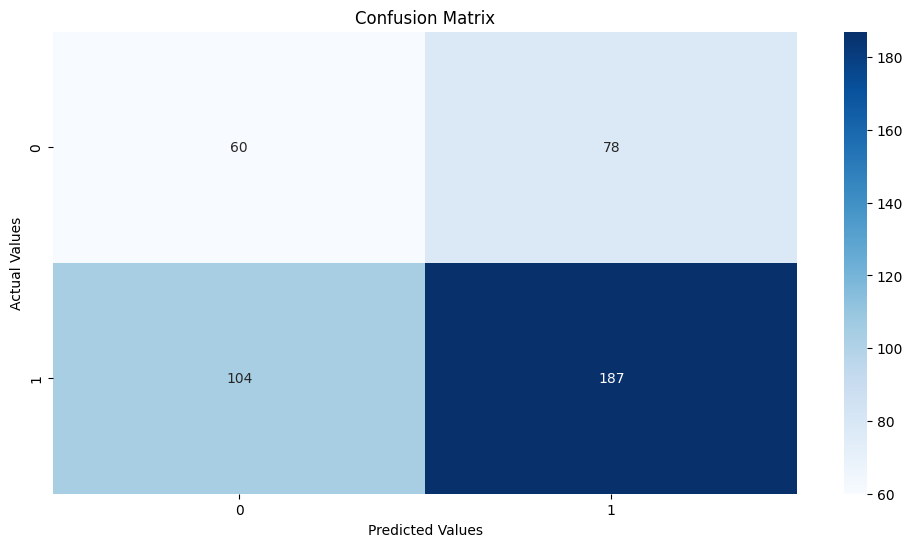

In [78]:
cm1=confusion_matrix(Y_val,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm1, annot=True,fmt="d", cmap="Blues")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [41]:
#x_train.to_csv("ukbiobank_variantsonlytraindata_eid.csv")
#y_train.to_csv("ukbiobank_variantsonlytrainy_eid.csv")
#x_test.to_csv("ukbiobank_variantsonlytestdata_eid.csv")
#y_test.to_csv("ukbiobank_variantsonlytesty_eid.csv")
#X_val.to_csv("ppmi_variantsonlyvaldata_eid.csv")
#Y_val.to_csv("ppmi_variantsonlyvaly_eid.csv")